In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv')
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [4]:
df.shape

(15501, 4)

In [5]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

Agora é hora de transformar os textos não estruturados em numeros que o modelo reconheça

### BAG OF WORDS

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['Comprei um produto ótimo', 'Comprei um produto ruim']
vectorizer = CountVectorizer()

bag_of_words = vectorizer.fit_transform(text)


In [7]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [8]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())
matriz_esparsa

comprei  produto  ruim  um  ótimo
0        1        1     0   1      1
1        1        1     1   1      0

In [9]:
vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 23352)


In [10]:
vectorizer = CountVectorizer(lowercase=False, max_features=50) #limita a 50 features
bag_of_words = vectorizer.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 50)


In [11]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())
matriz_esparsa_avaliacoes

Não  Produto  ainda  antes  as  até  bem  bom  chegou  com  ...  \
0        0        0      0      0   0    0    0    0       0    0  ...   
1        0        0      0      0   0    0    0    0       0    0  ...   
2        0        0      0      0   0    0    0    0       0    0  ...   
3        0        0      0      0   0    0    0    0       0    0  ...   
4        0        0      0      0   0    0    1    0       0    0  ...   
...    ...      ...    ...    ...  ..  ...  ...  ...     ...  ...  ...   
15496    0        0      0      0   0    0    0    0       0    0  ...   
15497    0        0      0      0   0    0    0    0       0    0  ...   
15498    0        0      0      0   0    0    0    0       0    0  ...   
15499    0        1      0      1   0    0    0    1       1    0  ...   
15500    0        0      0      0   0    0    0    0       0    0  ...   

       qualidade  que  recebi  recomendo  se  sem  tem  um  uma  veio  
0              0    0       0          1   0    0    0   0    0     0  
1              0    0       0          0   1    0    0   0    0     0  
2              0    0       0          0   0    0    0   0    0     0  
3              0    1       0          0   0    0    0   0    0     0  
4              1    2       0          0   0    0    0   0    0     0  
...          ...  ...     ...        ...  ..  ...  ...  ..  ...   ...  
15496          0    0       0          1   0    0    0   0    0     0  
15497          0    1       0          0   0    0    1   0    0     0  
15498          0    0       0          0   0    0    0   1    0     0  
15499          0    0       0          0   0    0    0   0    0     0  
15500          0    0       0          0   0    0    0   0    0     0  

[15501 rows x 50 columns]

### TRAIN TEST SPLIT ###

In [12]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(bag_of_words, df.sentimento, random_state=4978)

In [13]:
from sklearn.linear_model import LogisticRegression

regressa_logistica = LogisticRegression()
regressa_logistica.fit(xtrain, ytrain)
acuracia = regressa_logistica.score(xtest, ytest)
print(f'Acurácia: {acuracia:.2f}')

Acurácia: 0.80


### MÃO NA MASSA

In [14]:
def classificar_texto(text, avaliacao, sentimento):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(text.avaliacao)

    xtrain, xtest, ytrain, ytest = train_test_split(bag_of_words, text.sentimento, random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(xtrain, ytrain)
    acuracia = regressao_logistica.score(xtest, ytest)
    print(f'Acurácia: {acuracia:.2f}')

### WORD CLOUD

In [15]:
from wordcloud import WordCloud

todas_palavras = [text for text in df.avaliacao]

In [16]:
todas_palavras = ' '.join([text for text in df.avaliacao])
print(todas_palavras)

Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancelam

In [17]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

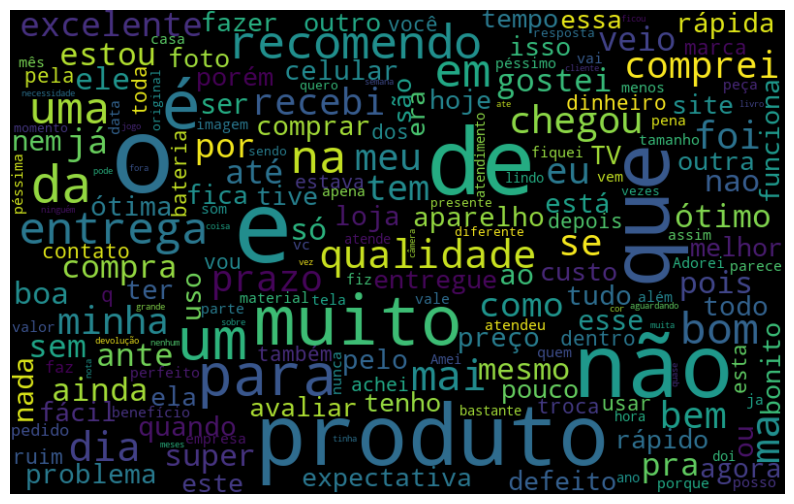

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
#separando por sentimento


def nuvem_por_sentimento( texto, avaliacao, sentimento):
    texto_sentimento = texto.query(f'sentimento == "{sentimento}"')[avaliacao]

    texto_unido = ' '.join(texto_sentimento)

    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()


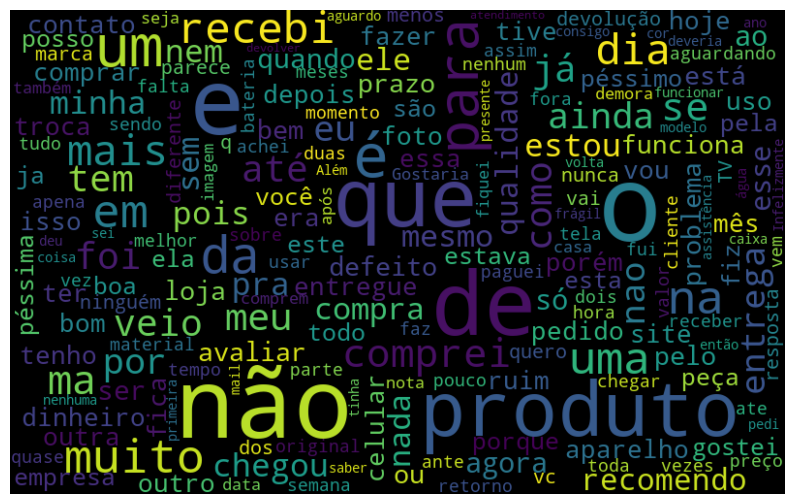

In [20]:
nuvem_por_sentimento(df, 'avaliacao', 'negativo')

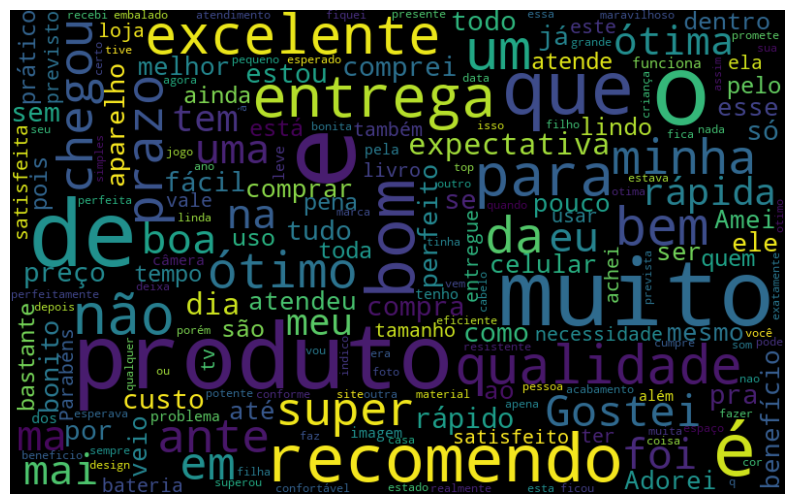

In [21]:
nuvem_por_sentimento(df, 'avaliacao', 'positivo')

### TOKENIZAÇÃO

1. Separar frases em palavras
2. Calcular a frequencia de cada palavra
3. Entender a distribuição
4. Remover palavras com baixo vaor semantico (preposições, artigos etc)

In [22]:
print(todas_palavras)

Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancelam

In [23]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\annab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\annab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\annab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\annab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\annab\AppData\Roaming\nltk_data...
[

True

In [24]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
token_frase = tokenizer.tokenize(todas_palavras)
token_frase

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu',
 'minhas',
 'expectativas,',
 'só',
 'achei',
 'a',
 'luz',
 'ruim,',
 'mas',
 'nada',
 'que',
 'dificulte',
 'seu',
 'funcionamento.',
 'Gostei',
 'muito,',
 'só',
 'achei',
 'que',
 'ficou',
 'a',
 'desejar',
 'a',
 'qualidade',
 'das',
 'fotos.',
 'Achei',
 'que',
 'fosse',
 'bem',
 'melhor',
 '.',
 'Comprei',
 'o',
 'produto',
 'e',
 'ñ',
 'tinha',
 'para',
 'entrega',
 'isso',
 'não',
 'foi',
 'legal!!!!!!',
 'o',
 'produto',
 'pode',
 'até',
 'ser',
 'bom',
 ',mais',
 'só',
 'posso',
 'avalia-lo',
 'depo

In [25]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [26]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})
df_frequencia.head()

Palavra  Frequência
0           Esse         101
1     smartphone          33
2        superou          90
3         minhas         533
4  expectativas,          79

In [27]:
df_frequencia.nlargest(columns='Frequência', n=5)

Palavra  Frequência
8        e       11813
6        o       10865
29      de       10280
19       a        8873
46     que        7657

C:\Users\annab\AppData\Local\Temp\ipykernel_7996\4173035769.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n=20),


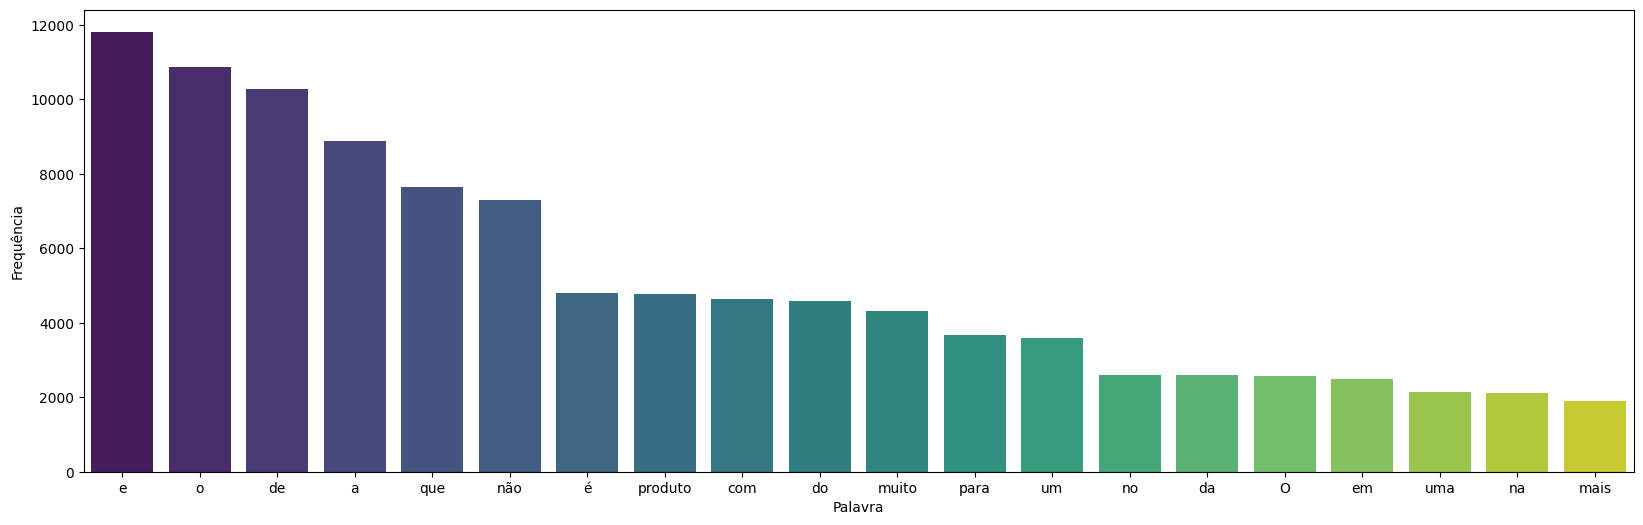

In [28]:
import seaborn as sns

plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n=20),
                 x='Palavra', y='Frequência', palette='viridis')
plt.show()

### MÃO NA MASSA

In [29]:
def grafico_frequencia(texto, coluna_texto, quantidade):  
    # Juntando todos os textos em uma única string
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    
    # Calculando a frequência das palavras
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    
    # Criando um DataFrame com as palavras e suas frequências
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                  "Frequência": list(frequencia.values())})
    
    # Selecionando as palavras mais frequentes
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    
    # Criando o gráfico de barras
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")
    ax.set(ylabel="Contagem")
    
    # Exibindo o gráfico
    plt.show()

C:\Users\annab\AppData\Local\Temp\ipykernel_7996\3477229465.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")


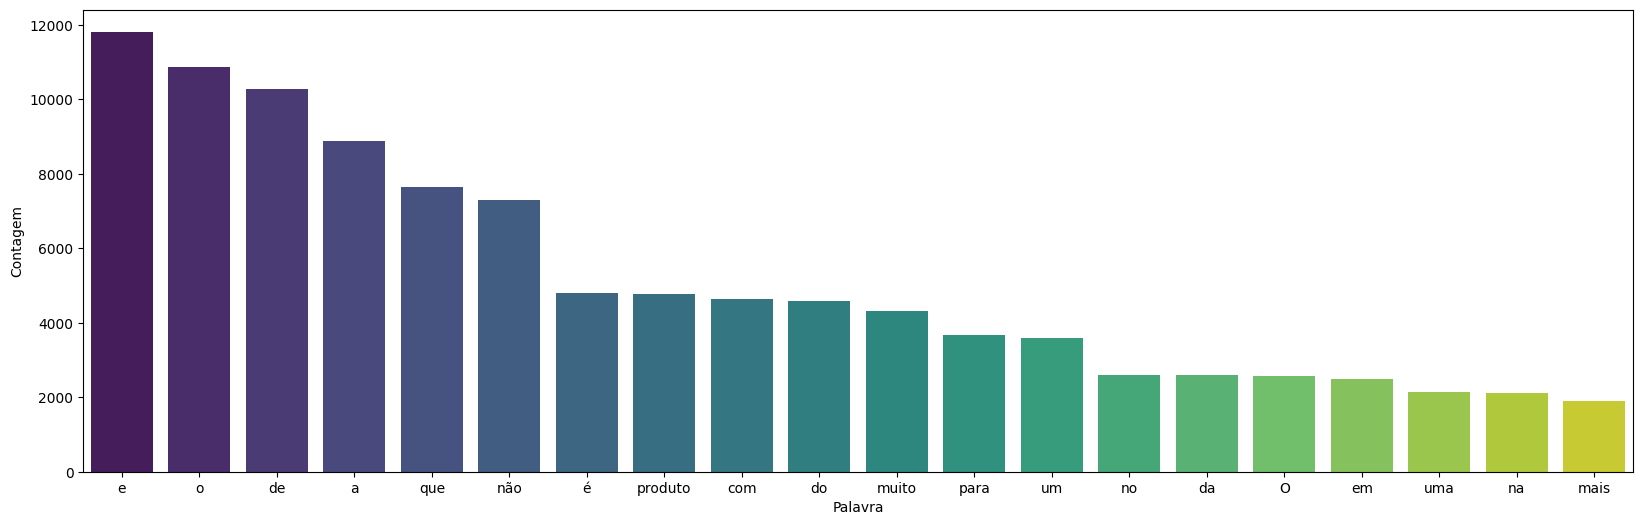

In [30]:
grafico_frequencia(df, 'avaliacao', 20)

### STOPWORDS

1. Remover palavras irrelevantes

In [31]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [32]:
frase_processada = []

for opiniao in df.avaliacao:
    palavras_texto = tokenizer.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

df['frase_processada1'] = frase_processada

In [33]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                  frase_processada1  
0   positivo    Esse smartphone superou expectativas, recomendo  
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...  
2   negativo  Eu fiz compra loja entregou produto, compra fe...  
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...  
4   positivo  Gostei muito, achei ficou desejar qualidade fo...

In [34]:
def classificar_texto(text, avaliacao, sentimento):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(text.avaliacao)

    xtrain, xtest, ytrain, ytest = train_test_split(bag_of_words, text.sentimento, random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(xtrain, ytrain)
    acuracia = regressao_logistica.score(xtest, ytest)
    print(f'Acurácia: {acuracia:.2f}')

In [35]:
classificar_texto(df, 'frase_processada1', 'sentimento')

Acurácia: 0.80


In [36]:
def grafico_frequencia(texto, coluna_texto, quantidade):  
    # Juntando todos os textos em uma única string
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    
    # Calculando a frequência das palavras
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    
    # Criando um DataFrame com as palavras e suas frequências
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                  "Frequência": list(frequencia.values())})
    
    # Selecionando as palavras mais frequentes
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    
    # Criando o gráfico de barras
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")
    ax.set(ylabel="Contagem")
    
    # Exibindo o gráfico
    plt.show()

C:\Users\annab\AppData\Local\Temp\ipykernel_7996\3477229465.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")


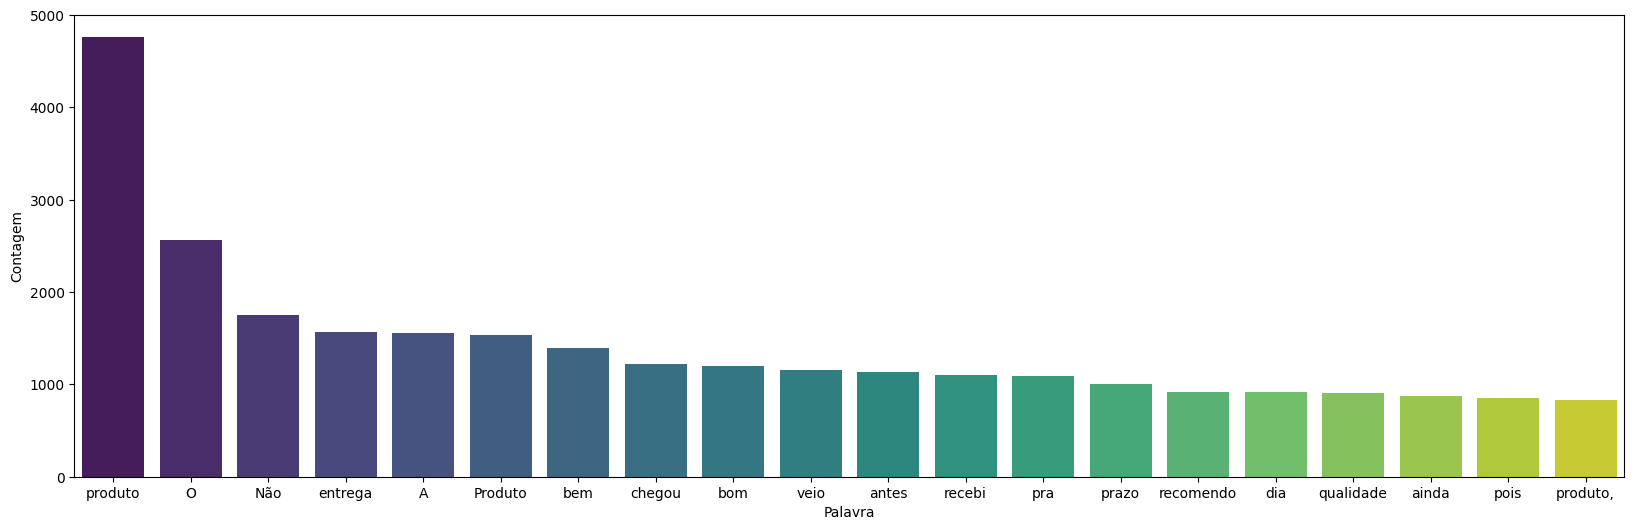

In [37]:
grafico_frequencia(df, 'frase_processada1', 20)

### PONTUAÇÃO

In [38]:
token_pontuacao = nltk.tokenize.WordPunctTokenizer()

frase_processada_2 = []
for opiniao in df['frase_processada1']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra .isalpha() and palavra not in palavras_irrelevantes]
    frase_processada_2.append(' '.join(nova_frase))

df['frase_processada2'] = frase_processada_2

In [41]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                  frase_processada1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                   frase_processada2  
0     Esse smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

C:\Users\annab\AppData\Local\Temp\ipykernel_7996\3477229465.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_frequencia, x="Palavra", y="Frequência", palette="viridis")


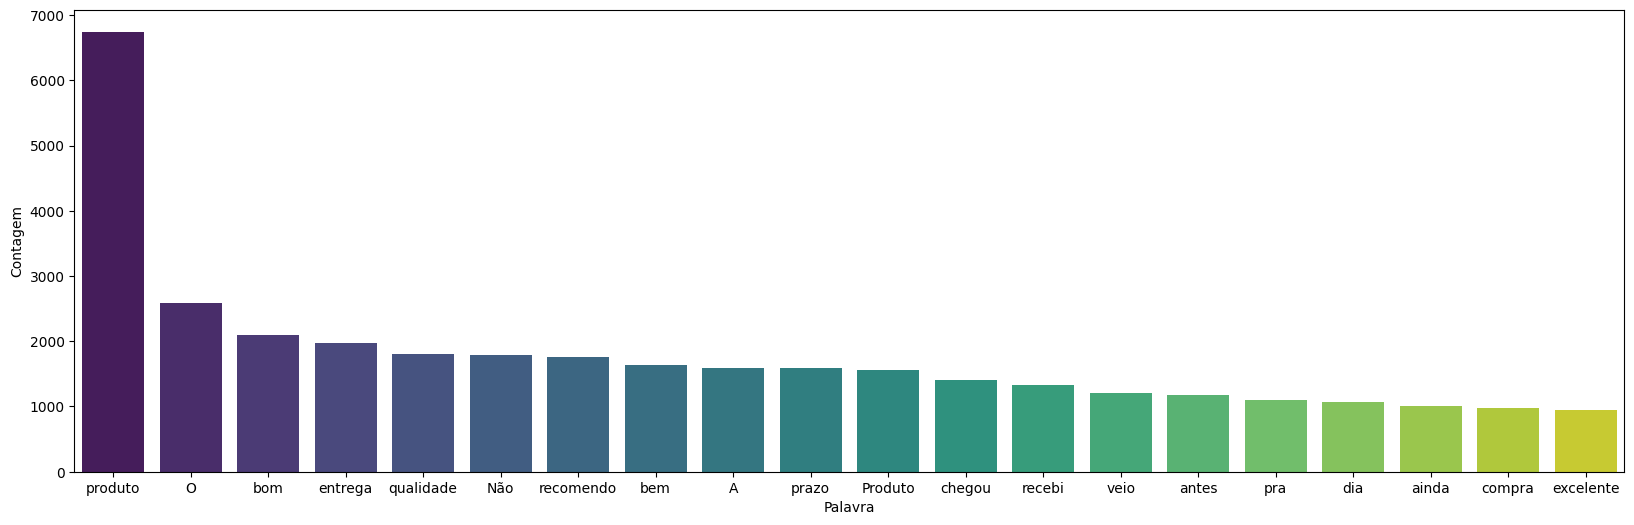

In [42]:
grafico_frequencia(df, 'frase_processada2', 20)

### ACENTUAÇÕES

In [44]:
import unidecode

ModuleNotFoundError: No module named 'unidecode'